In [1]:
import os, sys
print("CWD:", os.getcwd())
print("NumPy path:", __import__("numpy").__file__)

CWD: /Users/utkarshsingh/QML/QSVM/Maicon_kernel/qnn_codebase_v2/examples
NumPy path: /Users/utkarshsingh/miniforge3/envs/qml/lib/python3.11/site-packages/numpy/__init__.py


In [2]:
import sys
PKG_DIR = "/Users/utkarshsingh/QML/QSVM/Maicon_kernel/qnn_codebase_v2/"  # <- change me
sys.path.append(PKG_DIR)

In [3]:
# experiments/run_cls_estimator.py
import numpy as np
from qiskit_machine_learning.utils import algorithm_globals
from qiskit_machine_learning.optimizers import COBYLA
from qnn.circuits.qnn_circuit import build_qnn_raw, build_qnn_for_runtime
from qnn.primitives.factory import make_estimator
from qnn.networks.estimator_qnn import make_estimator_qnn
from qnn.models.classifier import make_classifier
from qnn.training.callbacks import LiveObjectivePlot

In [4]:
from numpy import arange
from matplotlib import pyplot

# QML
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#########################

file_name='regression_data_60.txt'
f = open(file_name, 'r')
n_features=4
n_data = sum(1 for _ in open(file_name, 'r'))
print("n_data:", n_data)
data_list = [[0.0 for i in range(n_features)] for j in range(n_data)]
z_list = []

counter01 = 0
for iLine in f:
    tmp01_f = []
    tmp01_f = iLine.split()
    for iFeature in range(len(tmp01_f)):
         if iFeature < n_features:
             data_list[counter01][iFeature] = float(tmp01_f[iFeature])
         if iFeature == n_features:
              z_list.append(float(tmp01_f[iFeature]))

    counter01 = counter01 + 1

# print("data_list:", data_list, len(data_list))
# print("z_list:", z_list, len(z_list))

n_data: 60


In [5]:
from sklearn.preprocessing import StandardScaler

X_train_non_scaled, X_test_non_scaled, y_train, y_test = train_test_split(data_list, z_list, test_size=0.20, random_state=42)

## Scaling ##
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_non_scaled)
X_test = scaler.transform(X_test_non_scaled)
## End scaling ##

print("X_train:", X_train)
print("type(X_train):", type(X_train))

X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)


X_train: [[ 9.59952245e-01  5.05547008e-01  1.05762486e+00 -4.39997219e-01]
 [-6.77295036e-01 -4.15097703e-01  3.20320905e-01 -4.39997219e-01]
 [ 9.27971712e-01  1.62485716e+00  7.40123441e-01 -4.39997219e-01]
 [ 9.59952245e-01  5.05547008e-01 -3.73754302e-01 -4.39997219e-01]
 [-5.45472839e-01 -6.00841811e-01 -9.05502502e-01 -4.39997219e-01]
 [-1.46588818e+00 -1.07731583e+00 -9.11099870e-01 -4.39997219e-01]
 [-7.95076998e-01 -7.38130935e-01 -7.99152526e-01 -4.39997219e-01]
 [-7.62316452e-01 -6.46066464e-01 -3.79349990e-01 -4.39997219e-01]
 [ 4.99744577e-01  4.40940361e-01  1.85959687e+00 -4.39997219e-01]
 [ 9.59952245e-01  5.05547008e-01 -3.17560094e-01 -4.39997219e-01]
 [-4.67471539e-01  5.05547008e-01 -7.99152526e-01  8.76030500e-01]
 [ 2.60811971e+00  2.66986966e+00  6.28176098e-01 -4.39997219e-01]
 [ 6.68373637e-02  2.09971601e-02 -9.11099870e-01 -4.39997219e-01]
 [ 9.59952245e-01  5.05547008e-01 -7.56706852e-01 -4.39997219e-01]
 [-6.62474789e-01 -6.08917642e-01 -7.99152526e-01  3.

In [6]:
y_train[0]

np.float64(4.817)

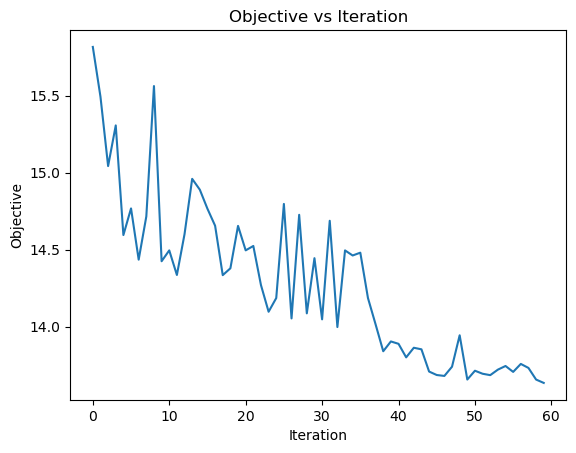

acc (sim): -1.638369872055999


In [7]:
import numpy as np
from qnn.easy import QNNEasyRegressor

clf = QNNEasyRegressor(mode="simulation")
clf.fit(X_train, y_train)
print("acc (sim):", clf.score(X_train, y_train))

In [10]:
predictions_train = clf.predict(X_train)
print("\npredictions_train:", predictions_train)


predictions_train: [[ 0.48306055]
 [ 0.44095416]
 [ 0.29062373]
 [ 0.45424229]
 [ 0.06615972]
 [ 0.16439054]
 [ 0.27495438]
 [ 0.20518848]
 [-0.09201193]
 [ 0.357683  ]
 [ 0.36036324]
 [ 0.56877884]
 [ 0.00591294]
 [ 0.49859398]
 [ 0.45304738]
 [ 0.33855033]
 [ 0.0174653 ]
 [ 0.14124528]
 [ 0.52254759]
 [ 0.53148895]
 [ 0.53432014]
 [ 0.25069474]
 [ 0.35355239]
 [ 0.55788017]
 [ 0.51655833]
 [ 0.07564685]
 [-0.08645641]
 [ 0.44151843]
 [-0.19075938]
 [ 0.13282292]
 [ 0.35137711]
 [ 0.00118967]
 [ 0.200259  ]
 [ 0.53037017]
 [ 0.17145478]
 [-0.10325342]
 [-0.19202987]
 [ 0.54474808]
 [ 0.30837846]
 [ 0.30939953]
 [ 0.53740141]
 [ 0.05942017]
 [ 0.34961288]
 [ 0.50096993]
 [-0.02396854]
 [ 0.08769626]
 [ 0.222373  ]
 [-0.10441306]]


In [11]:
mae_train =  mean_absolute_error(y_train, predictions_train)
print("mae_train:", mae_train)
mse_train =  mean_squared_error(y_train, predictions_train)
print("mse_train:", mse_train)
r2_train = r2_score(y_train, predictions_train)
print("r2_train:", r2_train)

mae_train: 2.964694028165218
mse_train: 13.634839548279666
r2_train: -1.638369872055999


In [13]:
predictions_test = clf.predict(X_test)
print("\npredictions_test:", predictions_test)
mae_test =  mean_absolute_error(y_test, predictions_test)
print("mae_test:", mae_test)
mse_test =  mean_squared_error(y_test, predictions_test)
print("mse_test:", mse_test)
r2_test = r2_score(y_test, predictions_test)
print("r2_test:", r2_test)


predictions_test: [[ 0.23014947]
 [ 0.51098093]
 [ 0.77297689]
 [-0.06990622]
 [-0.02076969]
 [ 0.19553201]
 [ 0.38695224]
 [ 0.5314062 ]
 [ 0.43496943]
 [ 0.09790557]
 [ 0.49869028]
 [ 0.39286124]]
mae_test: 3.473437636528612
mse_test: 18.583001576681927
r2_test: -2.0515463573195314


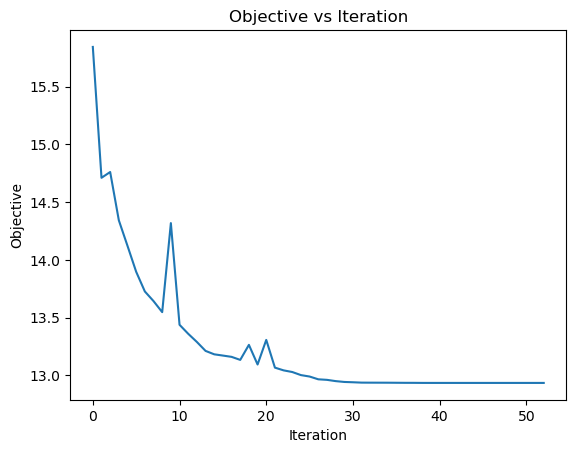

train MSE: 13.222718721646308


In [21]:
from qiskit_machine_learning.optimizers import L_BFGS_B
from qnn.models.regressor import make_regressor
from qnn.training.callbacks import LiveObjectivePlot

algorithm_globals.random_seed = 42

qc, in_pr, out_pr = build_qnn_raw(num_qubits=4)
estimator = make_estimator("statevector")
qnn = make_estimator_qnn(qc, estimator=estimator)#, input_params=in_pr, weight_params=out_pr)

callback = LiveObjectivePlot()
reg = make_regressor(qnn, optimizer=L_BFGS_B(maxiter=100), loss="squared_error", callback=callback)
reg.fit(X_train, y_train)
print("train MSE:", np.mean((reg.predict(X_train) - y_train)**2))


In [22]:
predictions_train = clf.predict(X_train)
print("\npredictions_train:", predictions_train)
mae_train =  mean_absolute_error(y_train, predictions_train)
print("mae_train:", mae_train)
mse_train =  mean_squared_error(y_train, predictions_train)
print("mse_train:", mse_train)
r2_train = r2_score(y_train, predictions_train)
print("r2_train:", r2_train)


predictions_train: [[ 0.48306055]
 [ 0.44095416]
 [ 0.29062373]
 [ 0.45424229]
 [ 0.06615972]
 [ 0.16439054]
 [ 0.27495438]
 [ 0.20518848]
 [-0.09201193]
 [ 0.357683  ]
 [ 0.36036324]
 [ 0.56877884]
 [ 0.00591294]
 [ 0.49859398]
 [ 0.45304738]
 [ 0.33855033]
 [ 0.0174653 ]
 [ 0.14124528]
 [ 0.52254759]
 [ 0.53148895]
 [ 0.53432014]
 [ 0.25069474]
 [ 0.35355239]
 [ 0.55788017]
 [ 0.51655833]
 [ 0.07564685]
 [-0.08645641]
 [ 0.44151843]
 [-0.19075938]
 [ 0.13282292]
 [ 0.35137711]
 [ 0.00118967]
 [ 0.200259  ]
 [ 0.53037017]
 [ 0.17145478]
 [-0.10325342]
 [-0.19202987]
 [ 0.54474808]
 [ 0.30837846]
 [ 0.30939953]
 [ 0.53740141]
 [ 0.05942017]
 [ 0.34961288]
 [ 0.50096993]
 [-0.02396854]
 [ 0.08769626]
 [ 0.222373  ]
 [-0.10441306]]
mae_train: 2.964694028165218
mse_train: 13.634839548279666
r2_train: -1.638369872055999


In [23]:
predictions_test = clf.predict(X_test)
print("\npredictions_test:", predictions_test)
mae_test =  mean_absolute_error(y_test, predictions_test)
print("mae_test:", mae_test)
mse_test =  mean_squared_error(y_test, predictions_test)
print("mse_test:", mse_test)
r2_test = r2_score(y_test, predictions_test)
print("r2_test:", r2_test)


predictions_test: [[ 0.23014947]
 [ 0.51098093]
 [ 0.77297689]
 [-0.06990622]
 [-0.02076969]
 [ 0.19553201]
 [ 0.38695224]
 [ 0.5314062 ]
 [ 0.43496943]
 [ 0.09790557]
 [ 0.49869028]
 [ 0.39286124]]
mae_test: 3.473437636528612
mse_test: 18.583001576681927
r2_test: -2.0515463573195314


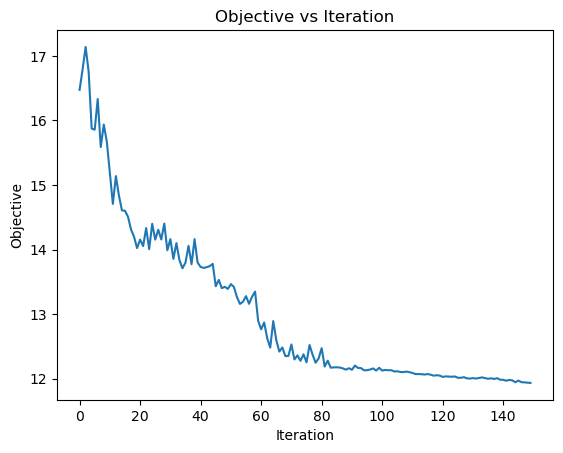

train MSE: 12.878914633350266


In [40]:
from qiskit_machine_learning.optimizers import L_BFGS_B, COBYLA
from qnn.models.regressor import make_regressor
from qnn.training.callbacks import LiveObjectivePlot
from qnn.circuits.custom import yz_cx_encoding, hardware_efficient_ansatz, compose_encoder_ansatz
from qnn.observables.custom import ising_hamiltonian, z_on, parity_z
from qnn.networks.estimator_qnn import make_estimator_qnn
from qiskit.circuit.library import RealAmplitudes, EfficientSU2, PauliFeatureMap

algorithm_globals.random_seed = 42
num_qubits = 4
obs = ising_hamiltonian(num_qubits, J=1.0, h=0.3, topology="ring")   # or z_on(k, num_qubits) / parity_z(num_qubits)
qcc = EfficientSU2(num_qubits, reps=1)
en = yz_cx_encoding(num_qubits, reps=1)
ans = [qcc, qcc.parameters]
# enc = [qc, qc.parameters]
qc, in_pr, out_pr = compose_encoder_ansatz(enc, ans)

estimator = make_estimator("statevector")
qnn = make_estimator_qnn(qc, estimator=estimator, input_params=in_pr, weight_params=out_pr, observable=obs)

callback = LiveObjectivePlot()
reg = make_regressor(qnn, optimizer=COBYLA(maxiter=150), loss="squared_error", callback=callback)
reg.fit(X_train, y_train)
print("train MSE:", np.mean((reg.predict(X_train) - y_train)**2))

In [38]:
predictions_test = reg.predict(X_test)
print("\npredictions_test:", predictions_test)
mae_test =  mean_absolute_error(y_test, predictions_test)
print("mae_test:", mae_test)
mse_test =  mean_squared_error(y_test, predictions_test)
print("mse_test:", mse_test)
r2_test = r2_score(y_test, predictions_test)
print("r2_test:", r2_test)


predictions_test: [[-0.55407484]
 [-0.97975848]
 [ 0.05469865]
 [ 1.0284623 ]
 [ 0.16331202]
 [ 0.29989953]
 [-0.20876535]
 [ 0.07828335]
 [-0.17044785]
 [-0.61850968]
 [-0.28762473]
 [ 1.298474  ]]
mae_test: 3.9163332564808293
mse_test: 22.1547997622497
r2_test: -2.6380774242880998


In [39]:
qc.draw()

┌───────────────────────────────────────┐»
q_0: ┤0                                      ├»
     │                                       │»
q_1: ┤1                                      ├»
     │  PauliFeatureMap(x[0],x[1],x[2],x[3]) │»
q_2: ┤2                                      ├»
     │                                       │»
q_3: ┤3                                      ├»
     └───────────────────────────────────────┘»
«     ┌──────────────────────────────────────────────────────────────────────────────────────────────────────┐
«q_0: ┤0                                                                                                     ├
«     │                                                                                                      │
«q_1: ┤1                                                                                                     ├
«     │  EfficientSU2(θ[0],θ[1],θ[2],θ[3],θ[4],θ[5],θ[6],θ[7],θ[8],θ[9],θ[10],θ[11],θ[12],θ[13],θ[14],θ[15]) │
«q_2: ┤2                                                                                                     ├
«     │                                                                                                      │
«q_3: ┤3                                                                                                     ├
«     └──────────────────────────────────────────────────────────────────────────────────────────────────────┘